In [ ]:
from compute_pointer import get_df

df = get_df(flag=1)
df

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,EMA_12,EMA_26,MACD,Signal,MA5
23,2014-01-03,103.0,103.0,102.0,102.5,75.244667,38599000,50.000000,103.882708,103.844991,0.037717,-0.087924,104.6
24,2014-01-06,102.0,103.0,102.0,102.5,75.244667,23706000,51.612903,103.669984,103.745362,-0.075378,-0.085414,104.2
25,2014-01-07,102.5,103.0,102.0,102.0,74.877609,15836000,44.827586,103.413063,103.616076,-0.203013,-0.108934,103.4
26,2014-01-08,103.0,104.5,102.5,104.0,76.345802,30218000,60.714286,103.503361,103.644515,-0.141153,-0.115378,103.1
27,2014-01-09,102.5,103.0,100.5,101.0,74.143509,63998000,45.161290,103.118229,103.448625,-0.330396,-0.158382,102.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,2023-12-25,582.0,585.0,580.0,581.0,573.515503,9548143,64.102564,579.953886,575.426968,4.526918,4.984689,582.0
2458,2023-12-26,583.0,586.0,582.0,586.0,578.451111,16094308,68.181818,580.884057,576.210156,4.673901,4.922531,582.2
2459,2023-12-27,587.0,592.0,586.0,592.0,584.373840,33401336,78.260870,582.594202,577.379774,5.214428,4.980911,583.6
2460,2023-12-28,592.0,593.0,589.0,593.0,585.360901,25514849,76.744186,584.195094,578.536828,5.658266,5.116382,586.8


In [16]:
df = df.reset_index(drop=True)

In [17]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,EMA_12,EMA_26,MACD,Signal,MA5
0,2014-01-03,103.0,103.0,102.0,102.5,75.244667,38599000,50.000000,103.882708,103.844991,0.037717,-0.087924,104.6
1,2014-01-06,102.0,103.0,102.0,102.5,75.244667,23706000,51.612903,103.669984,103.745362,-0.075378,-0.085414,104.2
2,2014-01-07,102.5,103.0,102.0,102.0,74.877609,15836000,44.827586,103.413063,103.616076,-0.203013,-0.108934,103.4
3,2014-01-08,103.0,104.5,102.5,104.0,76.345802,30218000,60.714286,103.503361,103.644515,-0.141153,-0.115378,103.1
4,2014-01-09,102.5,103.0,100.5,101.0,74.143509,63998000,45.161290,103.118229,103.448625,-0.330396,-0.158382,102.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2023-12-25,582.0,585.0,580.0,581.0,573.515503,9548143,64.102564,579.953886,575.426968,4.526918,4.984689,582.0
2435,2023-12-26,583.0,586.0,582.0,586.0,578.451111,16094308,68.181818,580.884057,576.210156,4.673901,4.922531,582.2
2436,2023-12-27,587.0,592.0,586.0,592.0,584.373840,33401336,78.260870,582.594202,577.379774,5.214428,4.980911,583.6
2437,2023-12-28,592.0,593.0,589.0,593.0,585.360901,25514849,76.744186,584.195094,578.536828,5.658266,5.116382,586.8


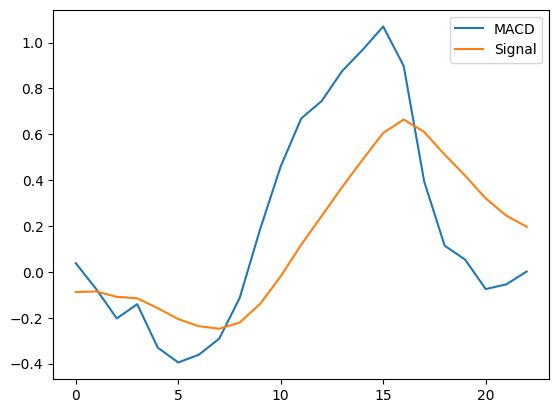

In [18]:
import matplotlib.pyplot as plt
plt.plot(df['MACD'][:23])
plt.plot(df['Signal'][:23])
plt.legend(['MACD', 'Signal'])

In [19]:
# 計算買賣信號
def buy_sell_signal(row):
    if row['MACD'] > row['Signal']:
        return 'Buy'  # 當MACD線突破信號線時，為買入信號
    elif row['MACD'] < row['Signal']:
        return 'Sell'  # 當MACD線跌破信號線時，為賣出信號
    else:
        return 'Hold'  # 沒有交叉時，保持原有持倉

# 應用判斷函數，並將信號列加入DataFrame
df['Signal_Indicator'] = df.apply(buy_sell_signal, axis=1)

# 顯示結果
print(df)

            Date   Open   High    Low  Close   Adj Close    Volume        RSI  \
0     2014-01-03  103.0  103.0  102.0  102.5   75.244667  38599000  50.000000   
1     2014-01-06  102.0  103.0  102.0  102.5   75.244667  23706000  51.612903   
2     2014-01-07  102.5  103.0  102.0  102.0   74.877609  15836000  44.827586   
3     2014-01-08  103.0  104.5  102.5  104.0   76.345802  30218000  60.714286   
4     2014-01-09  102.5  103.0  100.5  101.0   74.143509  63998000  45.161290   
...          ...    ...    ...    ...    ...         ...       ...        ...   
2434  2023-12-25  582.0  585.0  580.0  581.0  573.515503   9548143  64.102564   
2435  2023-12-26  583.0  586.0  582.0  586.0  578.451111  16094308  68.181818   
2436  2023-12-27  587.0  592.0  586.0  592.0  584.373840  33401336  78.260870   
2437  2023-12-28  592.0  593.0  589.0  593.0  585.360901  25514849  76.744186   
2438  2023-12-29  589.0  593.0  589.0  593.0  585.360901  18416318  74.358974   

          EMA_12      EMA_2

In [20]:
# 只保留需要的列
df = df[['Close', 'MACD', 'Signal', 'Signal_Indicator']]
df

,Close,MACD,Signal,Signal_Indicator
0,102.5,0.037717,-0.087924,Buy
1,102.5,-0.075378,-0.085414,Buy
2,102.0,-0.203013,-0.108934,Sell
3,104.0,-0.141153,-0.115378,Sell
4,101.0,-0.330396,-0.158382,Sell
...,...,...,...,...
2434,581.0,4.526918,4.984689,Sell
2435,586.0,4.673901,4.922531,Sell
2436,592.0,5.214428,4.980911,Buy
2437,593.0,5.658266,5.116382,Buy


In [21]:
df[-30:]

,Close,MACD,Signal,Signal_Indicator
2409,577.0,10.391519,7.167611,Buy
2410,585.0,11.042605,7.942610,Buy
2411,577.0,10.788696,8.511827,Buy
2412,578.0,10.546589,8.918779,Buy
2413,575.0,9.997398,9.134503,Buy
2414,568.0,8.894786,9.086560,Sell
2415,575.0,8.487955,8.966839,Sell
2416,574.0,7.992712,8.772014,Sell
2417,577.0,7.752933,8.568197,Sell
2418,579.0,7.636263,8.381811,Sell


In [3]:
def calculate_correlations(df):
    indicators = ['MA7', 'MA21', 'RSI', 'MACD', 'EMA_20', 'STD_20', 'DIF', 'K', 'D', 'Bias5', 'Bias10', 'Bias20', 'Upper_Band', 'Lower_Band']  # 列出你要計算的技術指標
    correlations = {}

    # 計算每個指標與 Close 的皮爾森相關係數
    for indicator in indicators:
        correlation = df['Close'].corr(df[indicator])
        correlations[indicator] = correlation

    return correlations

# 使用該函數計算相關係數
correlation_results = calculate_correlations(df)

# 顯示結果
for indicator, correlation in correlation_results.items():
    print(f"收盤價與 {indicator} 的皮爾森相關係數: {correlation}")

收盤價與 MA7 的皮爾森相關係數: 0.9993238936670235
收盤價與 MA21 的皮爾森相關係數: 0.9975338877357477
收盤價與 RSI 的皮爾森相關係數: -0.012560579791309501
收盤價與 MACD 的皮爾森相關係數: 0.16588873045767044
收盤價與 EMA_20 的皮爾森相關係數: 0.9983363888982443
收盤價與 STD_20 的皮爾森相關係數: 0.7540945123437794
收盤價與 DIF 的皮爾森相關係數: 0.15850905188083922
收盤價與 K 的皮爾森相關係數: -0.042431224930212515
收盤價與 D 的皮爾森相關係數: -0.04959163251796017
收盤價與 Bias5 的皮爾森相關係數: 0.016590145826574677
收盤價與 Bias10 的皮爾森相關係數: 0.02411597816657211
收盤價與 Bias20 的皮爾森相關係數: 0.035601729537200734
收盤價與 Upper_Band 的皮爾森相關係數: 0.9975353367347253
收盤價與 Lower_Band 的皮爾森相關係數: 0.9951277424031075
